## Linear Regression

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import ex1_func as fn
%matplotlib inline
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})

## 1 Linear regression with one variable

In this part of this exercise, linear regression with one variable is implemented to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

####  Loading and Visualizing Data

In [2]:
directory = os.getcwd()+ '/ex1data1.txt'
data = pd.read_csv(directory, header=None, names=['population','profit'])

# directly read csv file as a numpy array
# data1 = np.genfromtxt('/home/samet/Desktop/ng_assigments/my_assig/data/ex1data1.txt',delimiter=',')

data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


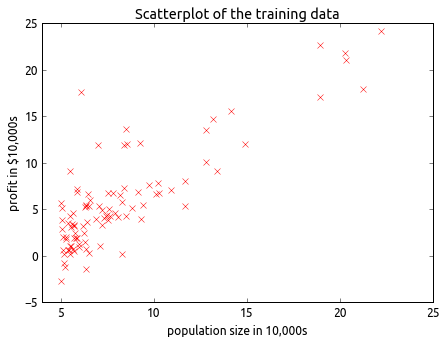

In [3]:
#matplotlib's object oriented api
fig1, axes = plt.subplots(figsize=(7,5))
axes.plot(data['population'], data['profit'],'rx')
axes.set_ylim([-5,25])
axes.set_xlim([4,25])
axes.set_title('Scatterplot of the training data')
axes.set_xlabel('population size in 10,000s')
axes.set_ylabel('profit in $10,000s');

#### Gradient descent

In [4]:


# assing variables
m,n  = data.shape
X = data['population'].reshape(m,1)
y = data['profit']

# add bias terms
X = np.insert(X, 0, 1,axis=1)
Y = y.values[:,np.newaxis]

# initialize fitting parameters
theta = np.zeros(2) 

# some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
cost = fn.computeCost(X, y, theta)
print 'Ininitial cost is :{}'.format(cost)

# run gradient descent
theta , J_history =  fn.gradientDescent(X, y, theta, alpha, iterations)
print '\nTheta found by gradient descent:'
print '{} {} \n'.format( theta[0], theta[1])

Ininitial cost is :32.0727338775

Theta found by gradient descent:
-3.6302914394 1.16636235034 



In [5]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print 'For population = 35,000, we predict a profit of {} \n'.format( predict1*10000)
predict2 = np.array([1, 7]).dot(theta)
print 'For population = 70,000, we predict a profit of {} \n'.format( predict2*10000)

For population = 35,000, we predict a profit of 4519.7678677 

For population = 70,000, we predict a profit of 45342.4501294 



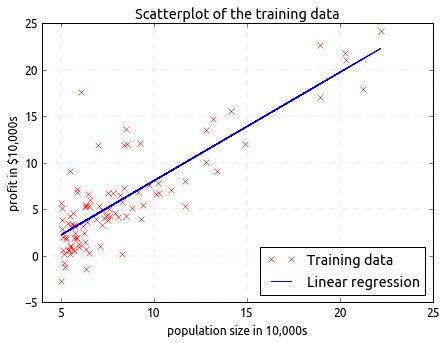

In [6]:
# Plot the linear fit
fig1, axes = plt.subplots(figsize=(7,5))
axes.plot(X[:,1], y, 'rx', label='Training data')
axes.plot(X[:,1],np.dot(X,theta), 'b', label='Linear regression')          
axes.legend(loc=4)
axes.set_ylim([-5,25])
axes.set_xlim([4,25])
axes.set_title('Scatterplot of the training data')
axes.set_xlabel('population size in 10,000s')
axes.set_ylabel('profit in $10,000s')
axes.grid(color='k', linestyle='dashed', alpha = 0.3, linewidth = 0.3)

#### Visualizing J(θ)

In [7]:
# intialize theta values
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array((theta0_vals[i],  theta1_vals[j]))
        J_vals[i,j] = fn.computeCost(X, y, t);

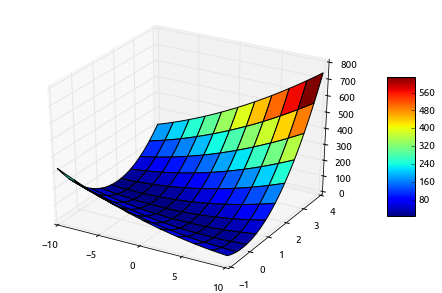

In [8]:
from mpl_toolkits.mplot3d import Axes3D
# in order to play with the graph, plot it seperately by using the magic
# %matplotlib qt
%matplotlib inline

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d',)
a, b = np.meshgrid(theta0_vals, theta1_vals)
surf = ax.plot_surface(a, b, J_vals.T,cmap=matplotlib.cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# RdPu alternative color

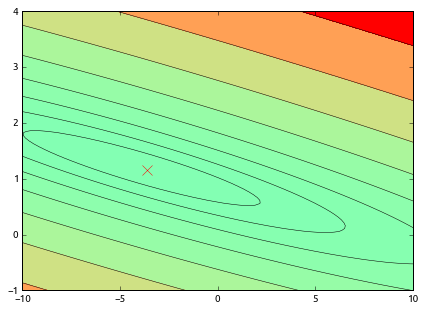

In [9]:
# Contour plot
#Because of the way meshgrids work in the surf command, we need to 
#transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

fig = plt.figure(figsize=(7,5))
plt.contour(a, b, J_vals,np.logspace(-2, 3, 20), linewidths=0.5,colors='k')
plt.contourf(a, b, J_vals,np.logspace(-2, 3, 20), 
             cmap=matplotlib.cm.rainbow,vmax=abs(J_vals).max(), vmin=-abs(J_vals).max())
plt.plot(theta[0],theta[1],'rx',MarkerSize= 10)
# plt.show()

#### Convergence Test

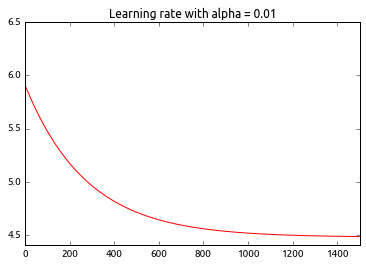

In [10]:
iterations = [i for i in range(1500)]
plt.plot(iterations,J_history,'r')
plt.axis([0,1501,4.4, 6.5])
plt.title('Learning rate with alpha = {}'.format(alpha))

## 2 Linear regression with multiple variables

In this part, linear regression with multiple variables is implemented to predict  the  prices  of  houses. Suppose  you  are  selling  your  house  and  you want to know what a good market price would be.  One way to do this is to first collect information on recent houses sold and make a model of housing prices.

#### Loading and Plotting Data

In [11]:
directory = os.getcwd()+ '/ex1data2.txt'
data = pd.read_csv(directory, header=None, names= ['size','noBedrooms','price'])

data.describe()

,size,noBedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


#### Feature Normalization

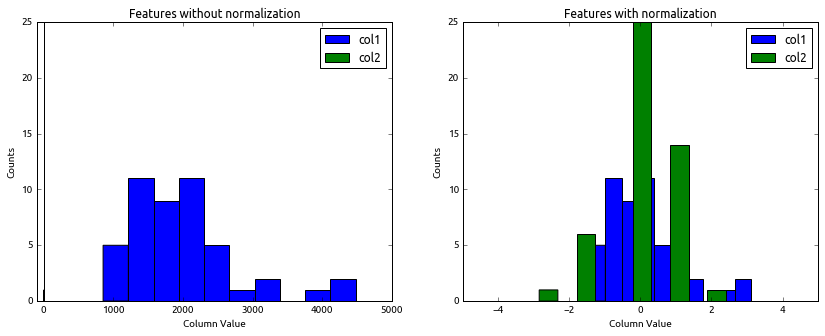

In [12]:


#compare normalized and raw feature values
fig1, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_xlim([-100,5000])
ax[0].hist(data['size'],label = 'col1')
ax[0].hist(data['noBedrooms'],label = 'col2')
ax[0].set_title('Features without normalization')
ax[0].set_xlabel('Column Value')
ax[0].set_ylabel('Counts')
ax[0].legend();

ax[1].set_xlim([-5,5])
ax[1].hist(fn.featureNorm(data[['size']].values)[0],label = 'col1')
ax[1].hist(fn.featureNorm(data[['noBedrooms']].values)[0],label = 'col2')
ax[1].set_title('Features with normalization')
ax[1].set_xlabel('Column Value')
ax[1].set_ylabel('Counts')
ax[1].legend();


#### Gradient Descent

In [13]:
# assing variables
X = data[['size','noBedrooms']].values
m,n = X.shape
y = data['price'].values.reshape(m,1)

# normalize features
Xnorm,sigma,mu = fn.featureNorm(X)

# add the bias terms
X = np.insert(Xnorm, 0, 1,axis=1)
X.shape

# initialize parameters 
alpha = 0.01
num_iters = 400

# initialize theta
theta = np.zeros(3)
print X.shape, y.shape, theta.shape

# compute theta and J_val's
theta , J_val =  fn.gradientDescentMulti(X,y,theta,alpha,num_iters)
print '\nTheta computed from gradient descent:'
print '{}'.format(theta)

(47, 3) (47, 1) (3,)

Theta computed from gradient descent:
[[ 334302.06399328]
 [ 100087.11600585]
 [   3673.54845093]]


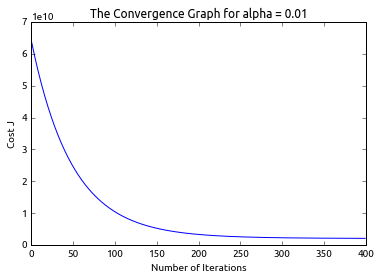

In [14]:
# Plot the convergence graph
plt.plot(range(num_iters),J_val)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations')
plt.title('The Convergence Graph for alpha = {}'.format(alpha))

In [15]:
# Estimate the price of a 1650 sq-ft, 3 br house
new_X = np.array([1650.,3.])
price = np.dot(np.append(1,(new_X-mu)/sigma),theta)
print '\nPredicted price of a 1650 sq-ft, 3 br house is ${}'.format(price[0])


Predicted price of a 1650 sq-ft, 3 br house is $289314.620338


#### Playing with Alpha

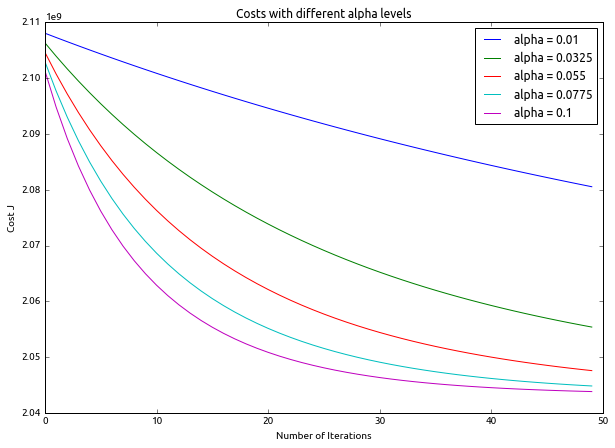

In [16]:
# initialize alpha values
alps = np.linspace(0.01,0.1,5)
num_iters = 50

# Plot J vals for different levels of alpha
fig, ax = plt.subplots(figsize=(10,7))
for e in range(len(alps)):
    ax.plot(range(num_iters),fn.gradientDescentMulti(X,y,theta,alps[e],num_iters)[1],
            label='alpha = {}'.format(alps[e]))
ax.set_ylabel('Cost J')
ax.set_xlabel('Number of Iterations')
ax.set_title('Costs with different alpha levels')
ax.legend(loc=1);

## Normal Equations

In [17]:


# prepare data without normalization
X = data[['size','noBedrooms']].values
m,n = X.shape
y = data['price'].values.reshape(m,1)

# add the bias terms
X = np.insert(X, 0, 1,axis=1)

# weights calculated by normal equation
theta_norm = fn.normalEqn(X,y)
print '\nTheta computed from normal equations:'
print '{}'.format(theta_norm)

# Estimate the price of a 1650 sq-ft, 3 br house

new_X = np.array([1,1650,3]).reshape(3,1)
price = np.dot(new_X.T,theta_norm)

print '\nPredicted price of a 1650 sq-ft, 3 br house is {}$'.format(price[0][0])



Theta computed from normal equations:
[[ 89597.90954361]
 [   139.21067402]
 [ -8738.01911255]]

Predicted price of a 1650 sq-ft, 3 br house is 293081.464335$
